In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from scipy.io import loadmat

data_set = loadmat("D:/ML_Datasets/mnist-original.mat")

In [3]:
print(data_set)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014', '__version__': '1.0', '__globals__': [], 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
      dtype=object), 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}


In [4]:
#rows = data_set['label']
#dataVal = data_set['data']
data_dict = {}

mnist_data = data_set["data"].T
mnist_label = data_set["label"][0]
print(mnist_data.shape)
mnist_data1 = mnist_data.reshape(len(mnist_data), 28*28)
#print(mnist_label)


for i,v in enumerate(mnist_label):
    #print(i)
    c=1
    for j in mnist_data1[i]:
        
        data_dict.setdefault(c, []).append(j)
        c = c+1

    #data_dict.setdefault("x", []).append(mnist_data1[i])
    data_dict.setdefault("y", []).append(v)
    

(70000, 784)


In [5]:
#print(len(data_dict[2]))
#df = pd.DataFrame.from_dict(data_dict)

from itertools import zip_longest

# zip all the values together
zl = list(zip_longest(*data_dict.values()))

# create dataframe
df = pd.DataFrame(zl)
print(df)

       0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
0        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
69995    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
69996    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
69997    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
69998    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
69999    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

       778  779  780  781  782  783  784  
0       

In [6]:
print(df)

       0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
0        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
69995    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
69996    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
69997    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
69998    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
69999    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

       778  779  780  781  782  783  784  
0       

In [7]:
train_data = df.sample(frac = 0.6, random_state = 42)

test_val_data = df.drop(train_data.index)

val_data = test_val_data.sample(frac = 0.5, random_state = 42)

test_data = test_val_data.drop(val_data.index)


print("Train dataset:", train_data.shape[0])
print("Validation dataset:", val_data.shape[0])
print("test dataset:", test_data.shape[0])

Train dataset: 42000
Validation dataset: 14000
test dataset: 14000


In [8]:
x_train = train_data.iloc[:, 0:784]
y_train = train_data[784]

x_val = val_data.iloc[:, 0:784]
y_val = val_data[784]

x_test = test_data.iloc[:, 0:784]
y_test = test_data[784]

print( train_data.iloc[:, 0:784])

       0    1    2    3    4    5    6    7    8    9    ...  774  775  776  \
46730    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
48393    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
41416    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
34506    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
43725    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
67240    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
46341    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
64714    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
20362    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
30144    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

       777  778  779  780  781  782  783  
46730   

In [9]:
x_train1 = np.array(x_train)
y_train1 = np.array(y_train)

x_val1 = np.array(x_val)
y_val1 = np.array(y_val)

x_test1 = np.array(x_test)
y_test1 = np.array(y_test)
print(x_train1[100 , :])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0   64  115  -90 -119    3    0  100  -10   41    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0   18
   84  -56   -4   -6  -64  -44 -109   14  -64  -18   25    0    0    0
    0 

In [10]:
x_train1 = x_train1/255
x_val1 = x_val1/255
x_test1 = x_test1/255

In [11]:
print(len(x_train1[100]))

784


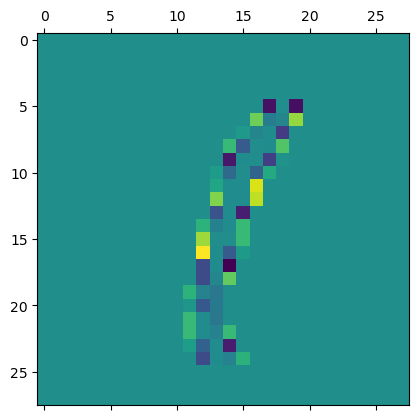

In [12]:
plt.matshow(x_train1[5, :].reshape(28, 28))

In [13]:
#x_train1 = [x_train1[i,:].reshape(28,28) for i in range(0, len(x_train))

X_train1 = x_train1.reshape(-1, 28,28)

print(X_train1)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [14]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(filters=50, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),

  Dense(units = 64, activation ='relu'),
  Dense(units = 16, activation = 'relu'),
  Dense(units = 10, activation = 'softmax')
])


In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
model.fit(X_train1, y_train1, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 167s 125ms/step - loss: 0.5203 - accuracy: 0.8287
Epoch 2/10
1313/1313 [==============================] - 144s 110ms/step - loss: 0.1838 - accuracy: 0.9414
Epoch 3/10
1313/1313 [==============================] - 137s 104ms/step - loss: 0.1330 - accuracy: 0.9584
Epoch 4/10
1313/1313 [==============================] - 118s 90ms/step - loss: 0.1045 - accuracy: 0.9659
Epoch 5/10
1313/1313 [==============================] - 191s 145ms/step - loss: 0.0824 - accuracy: 0.9738
Epoch 6/10
1313/1313 [==============================] - 218s 166ms/step - loss: 0.0672 - accuracy: 0.9773
Epoch 7/10
1313/1313 [==============================] - 161s 123ms/step - loss: 0.0532 - accuracy: 0.9825
Epoch 8/10
1313/1313 [==============================] - 122s 93ms/step - loss: 0.0434 - accuracy: 0.9850
Epoch 9/10
1313/1313 [==============================] - 120s 92ms/step - loss: 0.0362 - accuracy: 0.9880
Epoch 10/10
1313/1313 [==========================

In [17]:
train_acc = model.evaluate(X_train1, y_train1)
print("Train data accuracy= ", train_acc)

1313/1313 [==============================] - 38s 29ms/step - loss: 0.0200 - accuracy: 0.9936
Train data accuracy=  [0.019986474886536598, 0.9936190247535706]


In [19]:
X_val1 = x_val1.reshape(-1, 28, 28)
X_test1 = x_test1.reshape(-1, 28, 28)

history = model.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20, verbose=0)

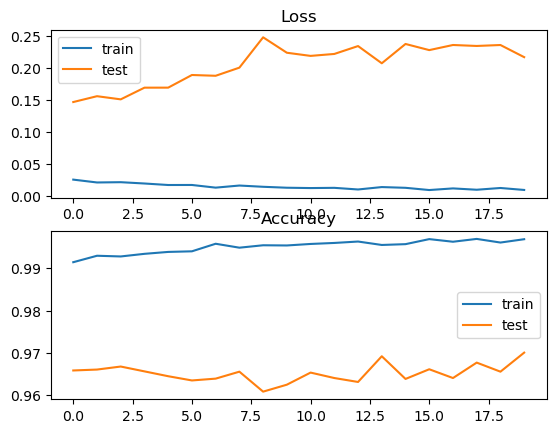

In [20]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [21]:
y_pred = model.predict(X_test1)
print(y_pred[1])
y_p = [np.argmax(i) for i in y_pred]

438/438 [==============================] - 17s 36ms/step
[1.0000000e+00 7.6995878e-14 2.4499335e-15 1.1645756e-12 1.9443178e-19
 6.8893784e-12 3.9180963e-12 3.1909550e-15 1.1941726e-12 4.0132134e-13]


In [22]:
cm = tf.math.confusion_matrix(labels = y_test1, predictions=y_p)

cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[1382,    0,    2,    2,    0,    2,   16,    0,    8,    2],
       [   0, 1557,    1,    1,    1,    2,    0,    6,    0,    1],
       [   5,    3, 1372,    5,    8,    2,    2,   11,    9,    3],
       [   1,    2,    8, 1372,    2,   12,    0,    8,   13,    9],
       [   0,    5,    2,    0, 1306,    1,    8,    4,    0,   22],
       [   2,    1,    0,    8,    2, 1232,    9,    1,    6,    6],
       [   0,    3,    0,    0,    5,    9, 1315,    0,    4,    0],
       [   0,    7,    8,    3,   13,    1,    0, 1414,    4,   21],
       [   1,    6,    4,    9,    5,   12,    8,    8, 1248,    9],
       [   5,    2,    0,    2,   17,    4,    0,   14,    2, 1392]])>

Text(95.72222222222221, 0.5, 'Truth')

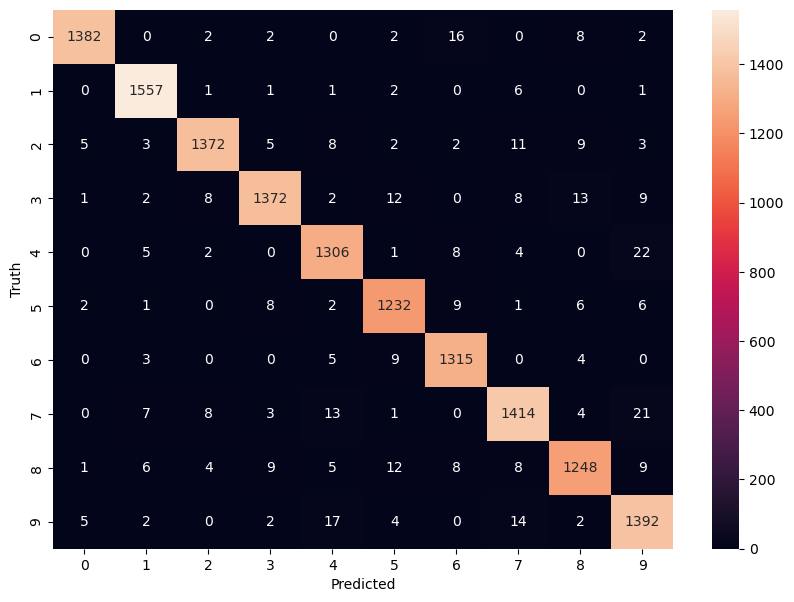

In [23]:
import seaborn as sn
plt.figure(figsize= (10,7))
sn.heatmap(cm, annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')